# Visualize the ADCP data

Load the packages:

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime 
%matplotlib widget

Specify the path to the data file to read:

In [2]:
#filename="../data/Level1/test/RDI300/L1_20230809_091533.nc"
filename="C:/Users/tdoda/L1_20230809_091533.nc"

### Open the data file

In [3]:
D = xr.open_dataset(filename)
D.close()
D

<xarray.Dataset>
Dimensions:    (time: 5009, depth: 110)
Coordinates:
  * time       (time) datetime64[ns] 2023-08-09T09:15:33 ... 2023-09-13T03:55:47
  * depth      (depth) float64 11.1 12.1 13.1 14.1 ... 117.1 118.1 119.1 120.1
Data variables: (12/24)
    u          (depth, time) float64 ...
    v          (depth, time) float64 ...
    w          (depth, time) float64 ...
    temp       (time) float64 ...
    vel_err    (depth, time) float64 ...
    echo1      (depth, time) float64 ...
    ...         ...
    heading    (time) float64 ...
    roll       (time) float64 ...
    pitch      (time) float64 ...
    time_qual  (time) float64 ...
    u_qual     (depth, time) float64 ...
    v_qual     (depth, time) float64 ...
Attributes: (12/17)
    institution:       EPFL
    source:            ADCP
    references:        LéXPLORE commun instruments camille.minaudo@epfl.ch>
    history:           See history on Renku
    conventions:       CF 1.7
    comment:           Data from ADCP on Lexplore Platform in Lake Geneva
    ...                ...
    bottom_depth:      110
    transducer_depth:  8
    xmit_length:       0.9400000000000001
    beam_angle:        20.0
    blank_dist:        2.0
    beam_freq:         300.0

In [4]:
dateval=D.time.values.astype("datetime64[s]").astype(datetime)
tnumval=D.time.values.astype("datetime64[s]").astype(np.int64)
depthval=D.depth.values

### Plot the quality data (correlation, echo, percentages good)

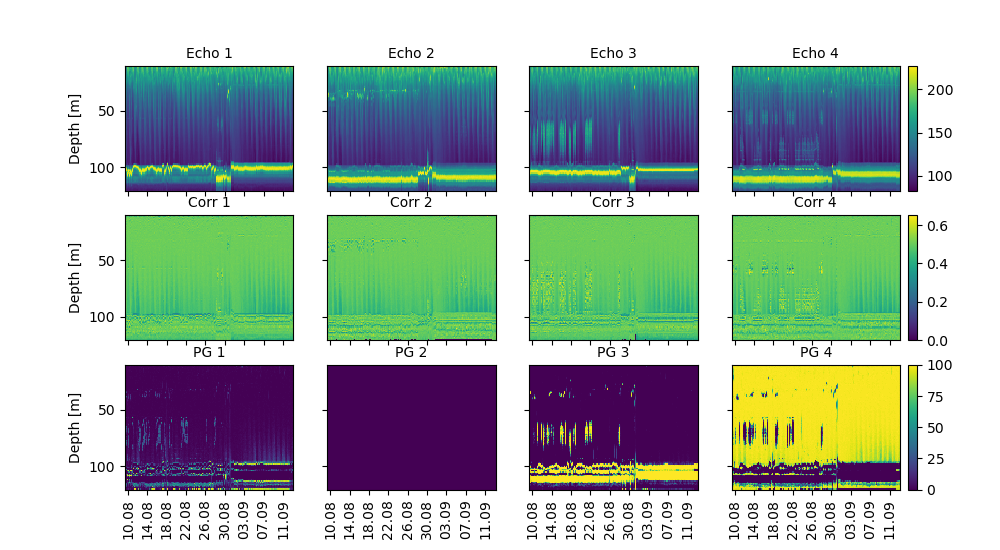

In [19]:
fig,ax=plt.subplots(3,4,figsize=(10,5.5),sharex=True,sharey=True)
cbwidth=0.05 # Width of the colorbar wth respect to the axis
dt=4 # Time step of the x axis [days]
title_size=10
minecho=np.min(np.array([D.echo1.values,D.echo2.values,D.echo3.values,D.echo4.values]))
maxecho=np.max(np.array([D.echo1.values,D.echo2.values,D.echo3.values,D.echo4.values]))
mincorr=np.min(np.array([D.corr1.values,D.corr2.values,D.corr3.values,D.corr4.values]))
maxcorr=np.max(np.array([D.corr1.values,D.corr2.values,D.corr3.values,D.corr4.values]))
minPG=np.min(np.array([D.prcnt_gd1.values,D.prcnt_gd2.values,D.prcnt_gd3.values,D.prcnt_gd4.values]))
maxPG=np.max(np.array([D.prcnt_gd1.values,D.prcnt_gd2.values,D.prcnt_gd3.values,D.prcnt_gd4.values]))

ax[0,0].pcolormesh(dateval,depthval,D.echo1.values,vmin=minecho,vmax=maxecho)
# ax[0,0].imshow(D.echo1.values, aspect='auto', cmap="viridis", origin='lower', extent=[dateval.min(), dateval.max(), depthval.min(), depthval.max()])
ax[0,0].set_title("Echo 1",fontsize=title_size)
ax[0,0].set_ylabel("Depth [m]")
ax[0,1].pcolormesh(dateval,depthval,D.echo2.values,vmin=minecho,vmax=maxecho)
ax[0,1].set_title("Echo 2",fontsize=title_size)
ax[0,2].pcolormesh(dateval,depthval,D.echo3.values,vmin=minecho,vmax=maxecho)
ax[0,2].set_title("Echo 3",fontsize=title_size)
pecho4=ax[0,3].pcolormesh(dateval,depthval,D.echo4.values,vmin=minecho,vmax=maxecho)
ax[0,3].set_title("Echo 4",fontsize=title_size)
bbox0=ax[0,3].get_position()
cbaxes = fig.add_axes([bbox0.x1+cbwidth*bbox0.width, bbox0.y0, cbwidth*bbox0.width, bbox0.height])  
fig.colorbar(pecho4,location="right",cax=cbaxes)
#ax[0,3].set_position([bbox0.x0,bbox0.y0,bbox0.width,bbox0.height])


ax[1,0].pcolormesh(dateval,depthval,D.corr1.values,vmin=mincorr,vmax=maxcorr)
ax[1,0].set_title("Corr 1",fontsize=title_size)
ax[1,0].set_ylabel("Depth [m]")
ax[1,1].pcolormesh(dateval,depthval,D.corr2.values,vmin=mincorr,vmax=maxcorr)
ax[1,1].set_title("Corr 2",fontsize=title_size)
ax[1,2].pcolormesh(dateval,depthval,D.corr3.values,vmin=mincorr,vmax=maxcorr)
ax[1,2].set_title("Corr 3",fontsize=title_size)
pcorr4=ax[1,3].pcolormesh(dateval,depthval,D.corr4.values,vmin=mincorr,vmax=maxcorr)
ax[1,3].set_title("Corr 4",fontsize=title_size)
bbox0=ax[1,3].get_position()
cbaxes = fig.add_axes([bbox0.x1+cbwidth*bbox0.width, bbox0.y0, cbwidth*bbox0.width, bbox0.height])  
fig.colorbar(pcorr4,location="right",cax=cbaxes)

ax[2,0].pcolormesh(dateval,depthval,D.prcnt_gd1.values,vmin=minPG,vmax=maxPG)
ax[2,0].set_title("PG 1",fontsize=title_size)
ax[2,0].set_ylabel("Depth [m]")
ax[2,1].pcolormesh(dateval,depthval,D.prcnt_gd2.values,vmin=minPG,vmax=maxPG)
ax[2,1].set_title("PG 2",fontsize=title_size)
ax[2,2].pcolormesh(dateval,depthval,D.prcnt_gd3.values,vmin=minPG,vmax=maxPG)
ax[2,2].set_title("PG 3",fontsize=title_size)
pPG4=ax[2,3].pcolormesh(dateval,depthval,D.prcnt_gd4.values,vmin=minPG,vmax=maxPG)
ax[2,3].set_title("PG 4",fontsize=title_size)
bbox0=ax[2,3].get_position()
cbaxes = fig.add_axes([bbox0.x1+cbwidth*bbox0.width, bbox0.y0, cbwidth*bbox0.width, bbox0.height])  
fig.colorbar(pPG4,location="right",cax=cbaxes)

ax[0,0].invert_yaxis()
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
ax[0,0].xaxis.set_major_locator(mdates.DayLocator(interval=dt))
ax[2,0].tick_params(axis='x', labelrotation=90)
ax[2,1].tick_params(axis='x', labelrotation=90)
ax[2,2].tick_params(axis='x', labelrotation=90)
ax[2,3].tick_params(axis='x', labelrotation=90)
